<a href="https://colab.research.google.com/github/Pablo-R-Navarro/deep-01-pep/blob/main/Monty-Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://www.itba.edu.ar/wp-content/uploads/2020/03/Marca-ITBA-Color-ALTA.png alt="ITBA" width="150"/>

# Diplomatura en Deep Learning

_2021 Q1_

_Pablo Navarro_ [in](https://www.linkedin.com/in/pablo-r-navarro) [@](mailto:pablo.r.navarro@outlook.com)


## Monty Hall Problem

Reference [Youtube](<https://www.youtube.com/watch?v=4Lb-6rxZxx0>)



In [1]:
#@title Python Environment
import sys
print(f'Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro} on {sys.platform}')
print(f'Environment: {sys.base_prefix}')

Python: 3.7.10 on linux
Environment: /usr


In [2]:
#@title Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

### Solution

`samples`: Number of samples.

`Car is at Door`: Door where the car is located (0, 1, 2).

`First Choice`: Door selected by the Guest (0, 1, 2).

`Chose to Change`: The Guest selects to change (1) or not to change (0) the door.

`Change`: Change Strategy - The Guest wins when his first choice was a Door with a Goat, the Presenter discards the one whith the other Goat, and therefore the Guest chooses the Door where the Car is.

`No Change`: Don't Change Strategy - Guest wins if he choose the Door where the Car is.

`Random`: Strategy of deciding to change or not to change Randomly - The Guest wins according to whether they initially choose a Door with a Goat and then choose to Change, or if they initially choose the Door that the Car has and then choose No Change.


In [3]:

samples = 1_000_000

mh = pd.DataFrame( {'Car is at Door': np.random.choice(3, samples), 
                    'First Choice': np.random.choice(3, samples), 
                    'Chose to Change': np.random.choice(2, samples)})

mh['Change'] = (mh['Car is at Door'] != mh['First Choice'])

mh['No Change'] = (mh['Car is at Door'] == mh['First Choice'])

mh['Random'] = (mh['No Change'] & ~ mh['Chose to Change']) | (mh['Change'] & mh['Chose to Change'])

mh.head(10)

,Car is at Door,First Choice,Chose to Change,Change,No Change,Random
0,0,0,0,False,True,True
1,2,0,1,True,False,True
2,0,2,1,True,False,True
3,1,2,1,True,False,True
4,0,0,1,False,True,False
5,2,0,0,True,False,False
6,2,0,0,True,False,False
7,1,1,1,False,True,False
8,0,2,1,True,False,True
9,2,2,0,False,True,True


In [4]:
#@title Results
results = pd.DataFrame({'Strategy': ['Change', 'No Change', 'Random'],
                        'Model': [mh['Change'].mean(), mh['No Change'].mean(), mh['Random'].mean()],
                        'Theory': [2./3., 1./3., 1./2.] })

results['Error'] = (results['Model'] - results['Theory'])*100 / results['Theory']

results

,Strategy,Model,Theory,Error
0,Change,0.666078,0.666667,-0.0883
1,No Change,0.333922,0.333333,0.1766
2,Random,0.499692,0.500000,-0.0616


The probability of obtaining the car following the Change doors strategy coincides with $\frac{2}{3}$ as indicated by the theory, while the probability of obtaining it following the strategy of Not Changing doors remains at $\frac{1}{3}$ as it was originally at the time of make the first choice.

The probability of obtaining the car by making a random choice coincides with the average of both probabilities $(0.5 \frac{1}{3} + 0.5 \frac{2}{3})= \frac{1}{2}$.

In [5]:
#@title Convergence Test
cum = np.arange(1, samples + 1)
mh['Cum Change'] = mh['Change'].cumsum() / cum
mh['Cum No Change'] = mh['No Change'].cumsum() / cum
mh['Cum Random'] = mh['Random'].cumsum() / cum

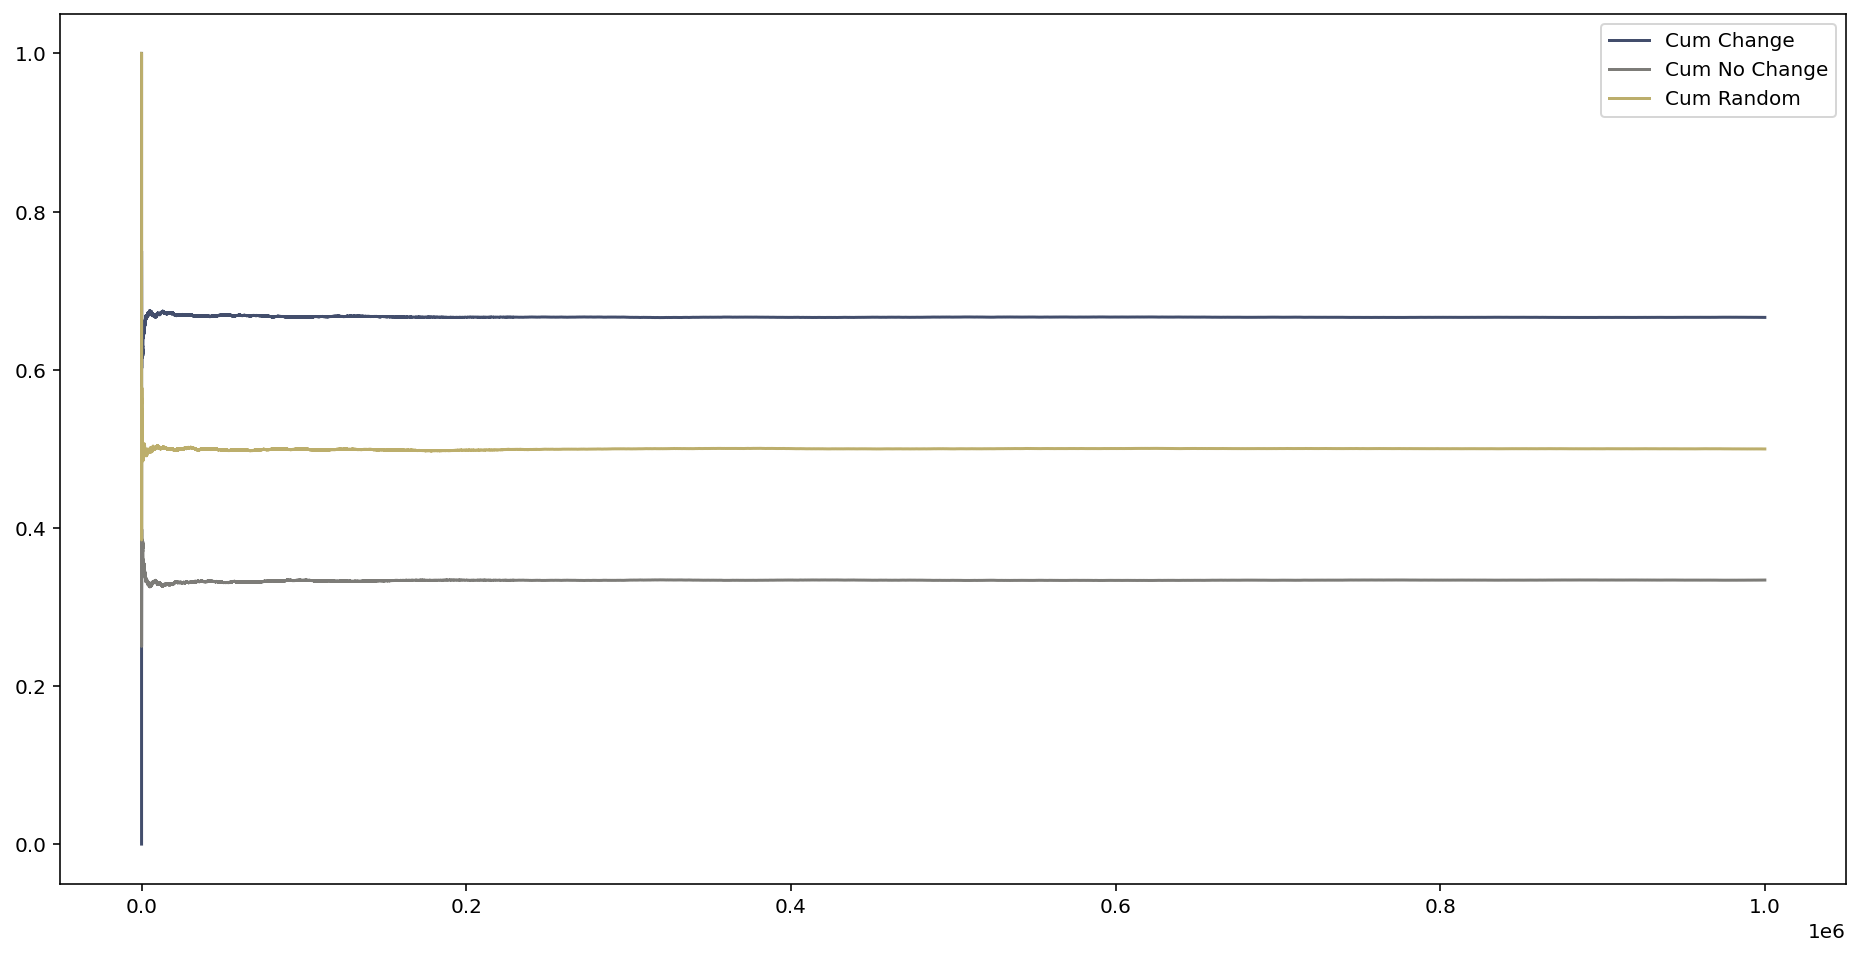

In [6]:
#@title
data= pd.DataFrame(mh, columns=['Cum Change', 'Cum No Change', 'Cum Random'])
plt.figure(figsize=(16,8))
sns.lineplot(data=data, palette='cividis', dashes=False)
plt.show()

.pn